## Подсчет частоты появления букв русского алфавита в словах
на примере романа Л.Н.Толстого "Война и мир"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook 
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')

import re
ABC = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 
       'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']

#### Роман будет представлен в коде как строковова переменная _str_ . Для сняти ограничений на размер переменной используем тройные кавычки _"""_. 
_Например:_

In [2]:
example = """Бывший чиновник интендантского управления, отставной коллежский секретарь Лахматов, сидел у себя за столом и, выпивая шестнадцатую рюмку, размышлял о братстве, равенстве и свободе. Вдруг из-за лампы выглянул на него чёрт… Но не пугайтесь, читательница. Вы знаете, что такое чёрт? Это молодой человек приятной наружности, с черной, как сапоги, рожей и с красными выразительными глазами. На голове у него, хотя он и не женат, рожки… Прическа а la Капуль. Тело покрыто зеленой шерстью и пахнет псиной. Внизу спины болтается хвост, оканчивающийся стрелой… Вместо пальцев — когти, вместо ног — лошадиные копыта. Лахматов, увидев чёрта, несколько смутился, но потом, вспомнив, что зеленые черти имеют глупое обыкновение являться ко всем вообще подвыпившим людям, скоро успокоился.
С кем я имею честь говорить? — обратился он к непрошенному гостю.

Чёрт сконфузился и потупил глазки.

— Вы не стесняйтесь, — продолжал Лахматов. — Подойдите ближе… Я человек без предрассудков, и вы можете говорить со мной искренно… по душе… Кто вы?

Чёрт нерешительно подошел к Лахматову и, подогнув под себя хвост, вежливо поклонился.

— Я чёрт, или дьявол… — отрекомендовался он. — Состою чиновником особых поручений при особе его превосходительства директора адской канцелярии г. Сатаны!

— Слышал, слышал… Очень приятно. Садитесь! Не хотите ли водки? Очень рад… А чем вы занимаетесь?"""
example

'Бывший чиновник интендантского управления, отставной коллежский секретарь Лахматов, сидел у себя за столом и, выпивая шестнадцатую рюмку, размышлял о братстве, равенстве и свободе. Вдруг из-за лампы выглянул на него чёрт… Но не пугайтесь, читательница. Вы знаете, что такое чёрт? Это молодой человек приятной наружности, с черной, как сапоги, рожей и с красными выразительными глазами. На голове у него, хотя он и не женат, рожки… Прическа а la Капуль. Тело покрыто зеленой шерстью и пахнет псиной. Внизу спины болтается хвост, оканчивающийся стрелой… Вместо пальцев — когти, вместо ног — лошадиные копыта. Лахматов, увидев чёрта, несколько смутился, но потом, вспомнив, что зеленые черти имеют глупое обыкновение являться ко всем вообще подвыпившим людям, скоро успокоился.\nС кем я имею честь говорить? — обратился он к непрошенному гостю.\n\nЧёрт сконфузился и потупил глазки.\n\n— Вы не стесняйтесь, — продолжал Лахматов. — Подойдите ближе… Я человек без предрассудков, и вы можете говорить со м

#### Загружаем роман и переводим все символы в нижний регистр

In [3]:
with open('r1.txt', 'r', ) as novel:  #encoding='cp1251'
     novel = str(novel.read()).lower()

#### Подсчитаем, как часто в тексте встречается та или иная буква русского алфавита

In [4]:
count = {}
for litera in tqdm_notebook(ABC):
    count[litera] = novel.count(litera)
       

  0%|          | 0/33 [00:00<?, ?it/s]

In [5]:
count

{'а': 188632,
 'б': 40008,
 'в': 106487,
 'г': 45312,
 'д': 70720,
 'е': 190761,
 'ё': 115,
 'ж': 24521,
 'з': 39427,
 'и': 156155,
 'й': 25752,
 'к': 77306,
 'л': 115339,
 'м': 68207,
 'н': 149070,
 'о': 265247,
 'п': 60592,
 'р': 101962,
 'с': 122689,
 'т': 135022,
 'у': 62626,
 'ф': 4712,
 'х': 19800,
 'ц': 8346,
 'ч': 33281,
 'ш': 21382,
 'щ': 6812,
 'ъ': 988,
 'ы': 44573,
 'ь': 44927,
 'э': 7062,
 'ю': 14176,
 'я': 50678}

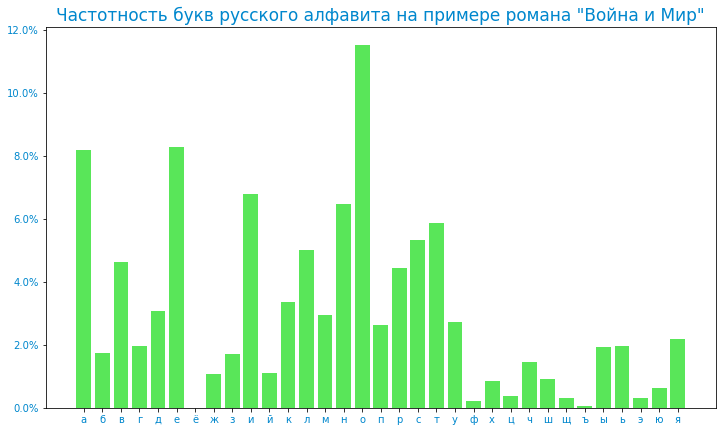

In [6]:
countvalues = list(count.values())
cc = countvalues/np.sum(countvalues)
_, ax =  plt.subplots(1,1, figsize=(12,7))
plt.title('Частотность букв русского алфавита на примере романа "Война и Мир"',c='#0087CD', fontsize=17)
plt.bar(count.keys(),cc, color = '#00D900', alpha=.65)
ax.set_xticklabels([])
ax.set_xticklabels(ABC, c='#0087CD', fontsize=10, rotation=0)
ax.set_yticklabels([])
ax.set_yticklabels([str(a)+'%' for a in np.linspace(0, 12, 7 )], c='#0087CD', fontsize=10, rotation=0) #[str(round(c*100, 2)) + '%' for c in cc]
plt.show()

#### Теперь выясним как распределяется количество букв _о_ в словах

In [7]:
# спиок "мусорных" слов
exceptions = ['–', '-', '*', 'i','ii', 'iii', 'iv','v','vi', 'vii', 'viii', 'ix', 'x','xi','xii', 'xiii', 'xiv',
 'xv', 'xvi', 'xvii', 'xviii', 'xix', 'xx', 'xxi', 'xxii', 'xxiii', 'xxiv', 'xxv', 'xxvi', 'xxvii', '', "notes1" ]
exceptions = exceptions + [str(i) for i in range (1000)] +  ["".join(("[",str(i),"]")) for i in range (1000)]

In [8]:
%%time
novel = novel.replace("\n\n", " ") # чистим множественные переносы без пробелов
exsp = novel.split(' ')
print ("Всего {} слов".format(len(exsp)))
# убираем "мусорные" слова и слова на французском
exsp = list(filter(lambda word: word not in exceptions  or  re.fullmatch('[a-z]+[а-я]*[a-z]+', word), exsp))
print ("Используется {} слов".format(len(exsp)))

Всего 481854 слов
Используется 460662 слов
CPU times: user 8.96 s, sys: 44.1 ms, total: 9.01 s
Wall time: 9.03 s


In [9]:
# Считаем сколько "о" в каждом слове 
litera = 'о'
o = list(map(lambda word: word.count(litera), exsp))
#plt.hist(o, bins=7);

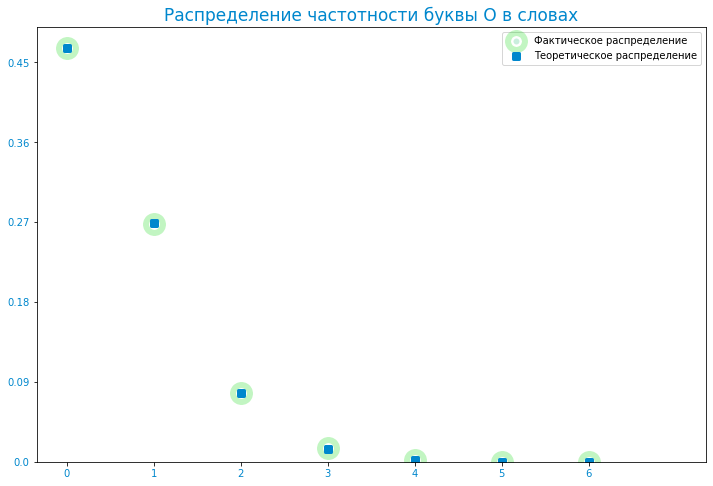

In [10]:
_, ax = plt.subplots(1,1, figsize=(12,8))

ylevel, _, _ = plt.hist(o, bins=7, visible=False)
xl = [i-1 for i, _ in enumerate(ylevel)]
y1 = ylevel/len(o)

plt.scatter(xl, ylevel , color = '#21BA72', alpha=.24, lw=17,  edgecolors = '#00D900',label="Фактическое распределение") 
plt.title('Распределение частотности буквы {} в словах'.format(litera.upper()),c='#0087CD', fontsize=17)

ax.set_xticklabels([])
ax.set_xticks(xl)
ax.set_xticklabels([i for i, _ in enumerate(ylevel)], c='#0087CD', fontsize=10, rotation=0)
ax.set_yticklabels([])

ax.set_yticklabels([y/100 for y in range(0, int(max(y1*100)), int(max(y1*100)//6))], c='#0087CD',
                   fontsize=10, rotation=0) 



rv = sts.poisson(np.mean(o))
xx = [i for i, _ in enumerate(ylevel)]
pmf = rv.pmf(xx) * len(o)
plt.scatter(np.array(xx)-1, pmf,color='#0087CD', label="Теоретическое распределение", marker='s', lw=3)
plt.legend()

plt.show()


#### Посмотрим сколько слов с каждой частотой

In [11]:
list(ylevel)


[259057.0, 148918.0, 43010.0, 8520.0, 1048.0, 97.0, 12.0]

In [12]:
big_o = list(filter(lambda word: word.count(litera) == 6 , exsp))
big_o

['однообразно-разнообразными',
 'противоположного',
 'ого-го-го-го-го!..»',
 'озабоченно-хлопотливой',
 'непреодолимо-обворожительным',
 'противоположного',
 'дорогомиловского',
 'дорогомиловского',
 'мрачно-сосредоточенного',
 'дорогомиловского',
 'холодно-спокойно',
 'спокойно-самодовольным']

In [13]:
len(big_o)

12

In [14]:
set_6o = set(big_o)
o_words = "\n\n".join(so for so in set_6o)
o_words

'озабоченно-хлопотливой\n\nоднообразно-разнообразными\n\nнепреодолимо-обворожительным\n\nого-го-го-го-го!..»\n\nдорогомиловского\n\nмрачно-сосредоточенного\n\nспокойно-самодовольным\n\nпротивоположного\n\nхолодно-спокойно'

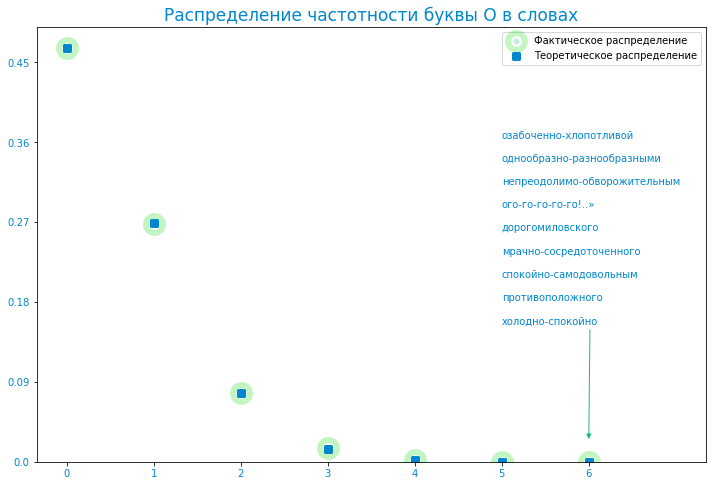

In [15]:
_, ax = plt.subplots(1,1, figsize=(12,8))

ylevel, _, _ = plt.hist(o, bins=7, visible=False)
xl = [i-1 for i, _ in enumerate(ylevel)]
y1 = ylevel/len(o)

plt.scatter(xl, ylevel , color = '#21BA72', alpha=.24, lw=17,  edgecolors = '#00D900',label="Фактическое распределение") 
plt.title('Распределение частотности буквы {} в словах'.format(litera.upper()),c='#0087CD', fontsize=17)

ax.set_xticklabels([])
ax.set_xticks(xl)
ax.set_xticklabels([i for i, _ in enumerate(ylevel)], c='#0087CD', fontsize=10, rotation=0)
ax.set_yticklabels([])

ax.set_yticklabels([y/100 for y in range(0, int(max(y1*100)), int(max(y1*100)//6))], c='#0087CD',
                   fontsize=10, rotation=0) 

#plt.text(3, max(ylevel)/3, o_words, c='#0087CD', fontsize=10)
#plt.arrow(4,max(ylevel)/3.7, .8, -max(ylevel)/4.7, width=.05, color='#21BA72' ) 
plt.annotate(o_words, xy=(5,max(ylevel)/20), xytext=(4, max(ylevel)/3),c='#0087CD', fontsize=10, 
            arrowprops=dict(arrowstyle="-|>",  color='#21BA72'))

rv = sts.poisson(np.mean(o))
xx = [i for i, _ in enumerate(ylevel)]
pmf = rv.pmf(xx) * len(o)
plt.scatter(np.array(xx)-1, pmf,color='#0087CD', label="Теоретическое распределение", marker='s', lw=3)
plt.legend()

plt.show()